In [2]:
!pip install chatterbot chatterbot_corpus


  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
    --------------------------------------- 0.3/12.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.2 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/12.2 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/12.2 MB 1.3 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.2 MB 1.3 MB/s eta 0:00:09
   ----- ---------------------------------- 1.6/12.2 MB 1.3 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/12.2 MB 1.4 MB/s eta 0:00:08
   ------ --------------------------------- 2.1/12.2 MB 1.4 MB/s eta 0:00:08
   -------- ------------------------------- 2.6/12.2 MB 1.4 MB/s eta 0:00:08
   ---------- ----------------------------- 3.1/12.2 MB 1.5 MB/s eta 0:00:07
   -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires python-dateutil==2.8.2, but you have python-dateutil 2.9.0.post0 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer
import ollama

In [4]:
df = pd.read_csv('resume_data.csv')

In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [9]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [12]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return ' '.join(words)


In [13]:
df['cleaned_resume'] = df['Resume'].apply(preprocess_text)

In [14]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_resume']).toarray()
y = df['Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
nb_model = MultinomialNB()

rf_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)


MultinomialNB()

In [16]:
y_pred_rf = rf_model.predict(X_test)
y_pred_nb = nb_model.predict(X_test)

In [19]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy (RandomForest): {accuracy_rf}")
print(f"Accuracy (Naive Bayes): {accuracy_nb}")

print(90*'-')

print("Classification Report (RandomForest):\n", classification_report(y_test, y_pred_rf))

print(90*'-')

print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Accuracy (RandomForest): 0.9896373056994818
Accuracy (Naive Bayes): 0.9896373056994818
------------------------------------------------------------------------------------------
Classification Report (RandomForest):
                            precision    recall  f1-score   support

                 Advocate       1.00      0.33      0.50         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      1.00      1.00        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.0

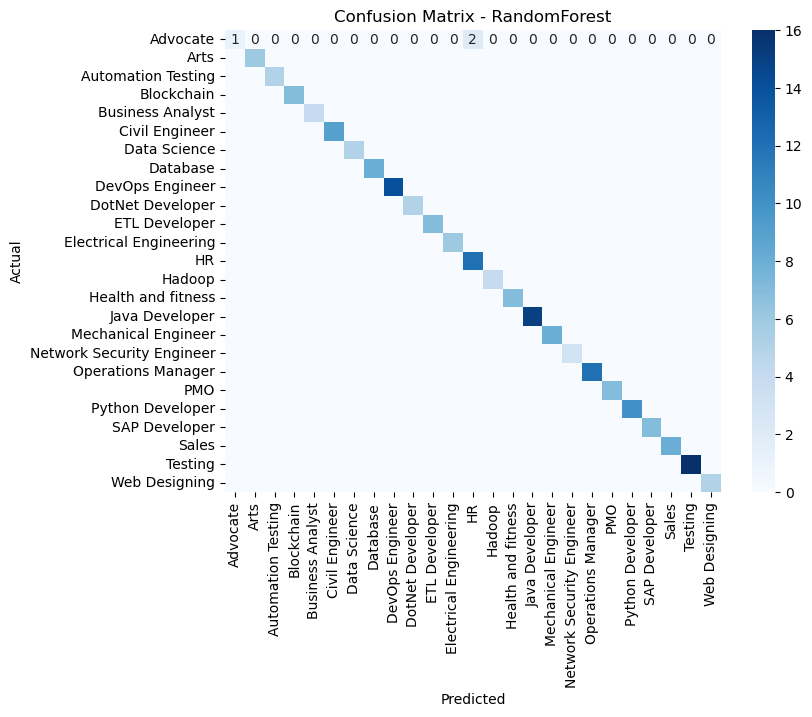

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RandomForest")
plt.show()


In [21]:
def classify_resume(text, model):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text]).toarray()
    prediction = model.predict(vectorized_text)
    return prediction[0]


In [28]:
def classify_resume_ollama(text):
    response = ollama.chat(model='mistral', messages=[{'role': 'user', 'content': f"Classify this resume: {text}"}])
    return response['message']['content']


In [29]:
!ollama pull mistral


pulling manifest â ‹ pulling manifest â ¹ pulling manifest â ¹ pulling manifest â ¼ pulling manifest â ´ pulling manifest â ´ pulling manifest â ¦ pulling manifest â § pulling manifest â ‡ pulling manifest â � pulling manifest 
pulling ff82381e2bea... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–� 4.1 GB                         
pulling 43070e2d4e53... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�  11 KB                         
pulling 491dfa501e59... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�  801 B                         
pulling ed11eda7790d... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�   30 B                         
pulling 42347cd80dc8... 100% â–•â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–�  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [30]:
example_resume = "Experienced software engineer skilled in Python, machine learning, and data science."
print("Predicted Category (RandomForest):", classify_resume(example_resume, rf_model))
print(90*'-')
print("Predicted Category (Naive Bayes):", classify_resume(example_resume, nb_model))
print(90*'-')
print("Predicted Category (Ollama LLM):", classify_resume_ollama(example_resume))


Predicted Category (RandomForest): Data Science
------------------------------------------------------------------------------------------
Predicted Category (Naive Bayes): Data Science
------------------------------------------------------------------------------------------
Predicted Category (Ollama LLM):  This resume fits into the category of a Data Scientist or Machine Learning Engineer role, given the skills mentioned are typically relevant to these positions. The candidate is an experienced Software Engineer, with a focus on areas like Python programming, machine learning, and data science.


In [33]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.4 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.2 MB/s eta 0:00:06
     ----- ---------------------------------- 1.8/12.8 MB 1.8 MB/s eta 0:00:07
     ------ --------------------------------- 2.1/12.8 MB 1.9 MB/s eta 0:00:06
     -------- ------------------------------- 2.6/12.8 MB 1.8 MB/s eta 0:00:06
     --------- ------------------------------ 2.9/12.8 MB 1.8 MB/s eta 0:00:06
     --------- ------------------------------ 3.1/12.8 MB 1.8 MB/s eta 0:00:06
     ----------- ---------------------------- 3.7/12.8 MB 1.8 MB/s eta 0:00:06
     ------------- -------------------------- 4.2/12.8 MB 1.8 MB/s eta 0:00:05
     ------------- -------------------------- 4.5/12.8 MB 1.8 MB/s


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer


chatbot = ChatBot("ResumeBot")
trainer = ListTrainer(chatbot)

conversation_data = []
for index, row in df.iterrows():
    conversation_data.append(f"What skills are required for {row['Category']}?")
    conversation_data.append(row['Resume'][:200] + "...")  # Using a snippet to avoid long responses

trainer.train(conversation_data)

def chat_with_bot():
    print("Chat with ResumeBot (type 'exit' to stop):")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            break
        response_chatbot = chatbot.get_response(user_input)
        response_ollama = classify_resume_ollama(user_input)
        print("ResumeBot (ChatterBot):", response_chatbot)
        print("ResumeBot (Ollama):", response_ollama)

List Trainer: 1924it [00:06, 308.51it/s]


In [ ]:
chat_with_bot()


Chat with ResumeBot (type 'exit' to stop):
You: how i make my resume 
ResumeBot (ChatterBot): Well, I don't have any emotions so I can't really feel sadness as such.
ResumeBot (Ollama):  This question does not provide a specific resume to classify, but I can give you general advice on making a resume effective. Here are some tips for structuring and formatting your resume:

1. Contact Information: Include your name, phone number, email address, and LinkedIn profile (if applicable) at the top of the document.

2. Summary Statement: Write a brief summary statement that highlights your professional skills, experiences, and career goals. Keep it concise (3-5 lines).

3. Work Experience: List your work experience in reverse chronological order, starting with the most recent position. Include the company name, job title, location, employment dates, and a bullet list of key responsibilities, achievements, and skills related to the role.

4. Education: List your educational background below yo

C:\Users\sumit\anaconda3\Lib\site-packages\chatterbot\storage\sql_storage.py:245: SAWarning: Object of type <Statement> not in session, add operation along 'Tag.statements' won't proceed (This warning originated from the Session 'autoflush' process, which was invoked automatically in response to a user-initiated operation.)
  tag = session.query(Tag).filter_by(name=tag_name).first()


ResumeBot (ChatterBot): What is AI?
ResumeBot (Ollama):  Based on the information provided in the text, I would classify this resume as a Professional Resume. Here's why:

1. The format is clean and easy to read, with a professional font and clear section headings.
2. The applicant lists their relevant work experience in reverse chronological order (most recent first), which is the standard format for a professional resume.
3. The applicant provides specific details about their achievements and responsibilities in each job, rather than simply listing duties. This shows that they have a strong understanding of the roles they've held and can demonstrate the impact they've made in those positions.
4. The resume includes a summary section, where the applicant briefly discusses their skills and qualifications, which is another common feature of professional resumes.
5. The applicant includes relevant keywords related to their industry (e.g., "project management," "strategic planning," "team